In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
pd.DataFrame(data={'NaN_count': df.isna().sum(), 'unique_values': df.nunique(), 'data_types': df.dtypes}).sort_values(by='unique_values', ascending=True)

,NaN_count,unique_values,data_types
Alley,1369,2,object
Street,0,2,object
Utilities,0,2,object
CentralAir,0,2,object
MasVnrType,872,3,object
HalfBath,0,3,int64
GarageFinish,81,3,object
LandSlope,0,3,object
BsmtHalfBath,0,3,int64
PavedDrive,0,3,object


In [6]:
from sklearn.model_selection import train_test_split

X, y = df.drop('SalePrice', axis=1), df['SalePrice']

# Делаем "корзины" для стратификации
y_bins = pd.qcut(y, q=10, duplicates="drop")  # q=10 значит 10 равных по количеству интервалов

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y_bins, random_state=42)

In [7]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 80), (1168,), (292, 80), (292,))

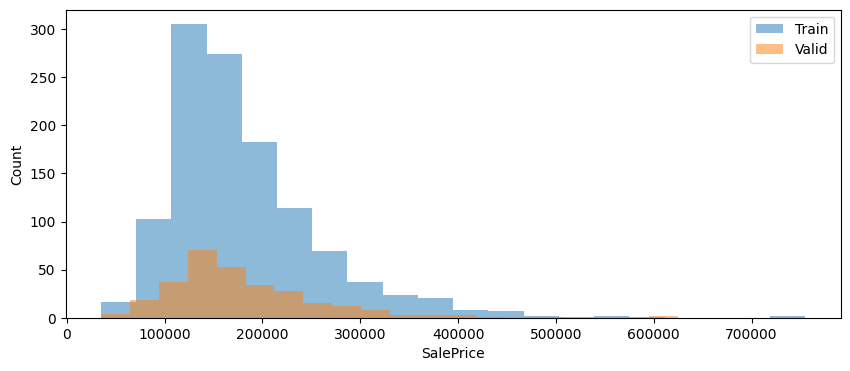

In [8]:
plt.figure(figsize=(10,4))

plt.hist(y_train, bins=20, alpha=0.5, label="Train")
plt.hist(y_valid, bins=20, alpha=0.5, label="Valid")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.legend()
plt.show()

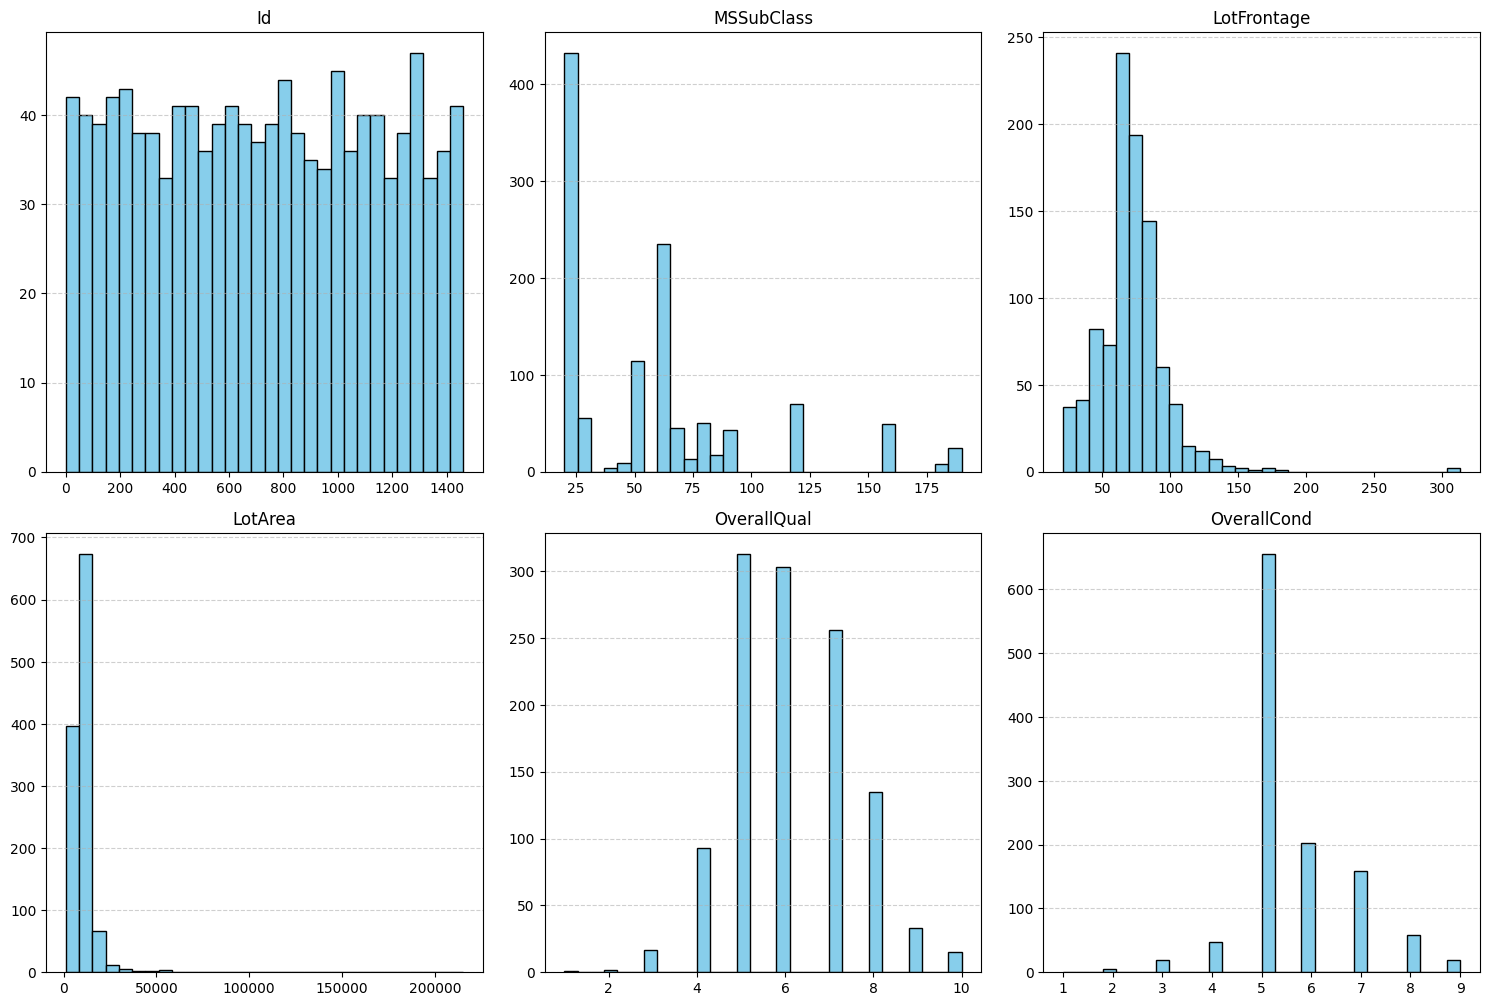

In [9]:
# Берем только числовые колонки
num_cols = X_train.select_dtypes(include='number').columns

# Размер сетки: подстраиваем под число признаков
n_cols = 3  # сколько графиков в строке
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(X_train[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

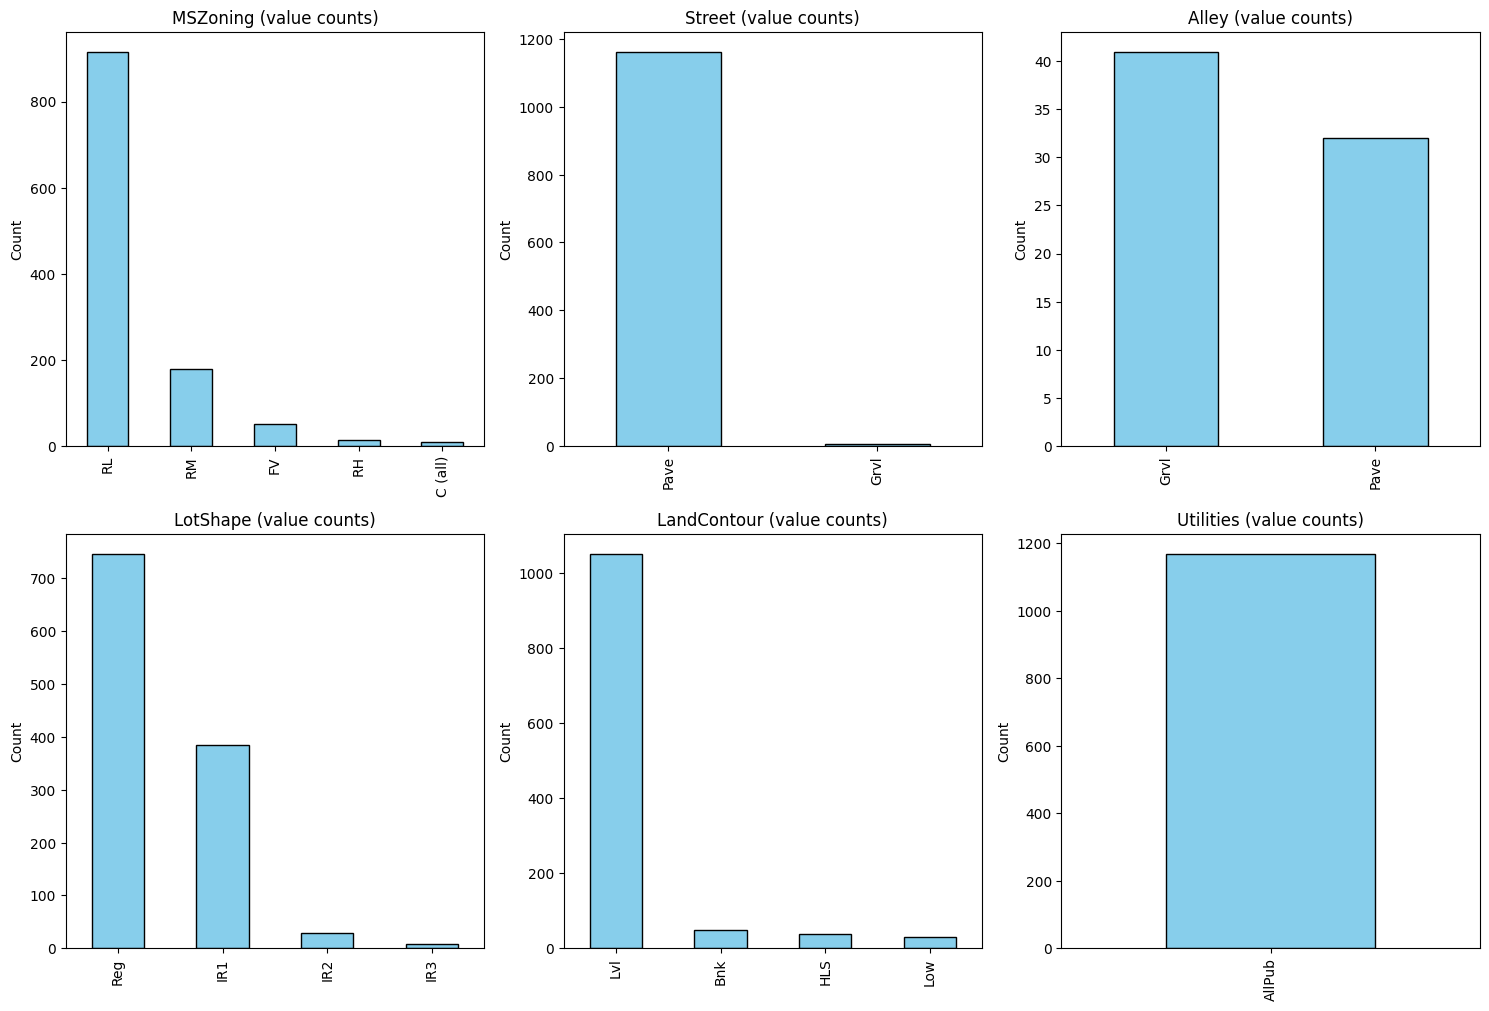

In [10]:
# выделим категориальные признаки
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

n_cols = 3  # сколько графиков в строке
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # число строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:6]):
    X_train[col].value_counts().plot(
        kind='bar',
        ax=axes[i],
        color='skyblue',
        edgecolor='black'
    )
    axes[i].set_title(f'{col} (value counts)')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# если осей больше, чем графиков — уберём лишние
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

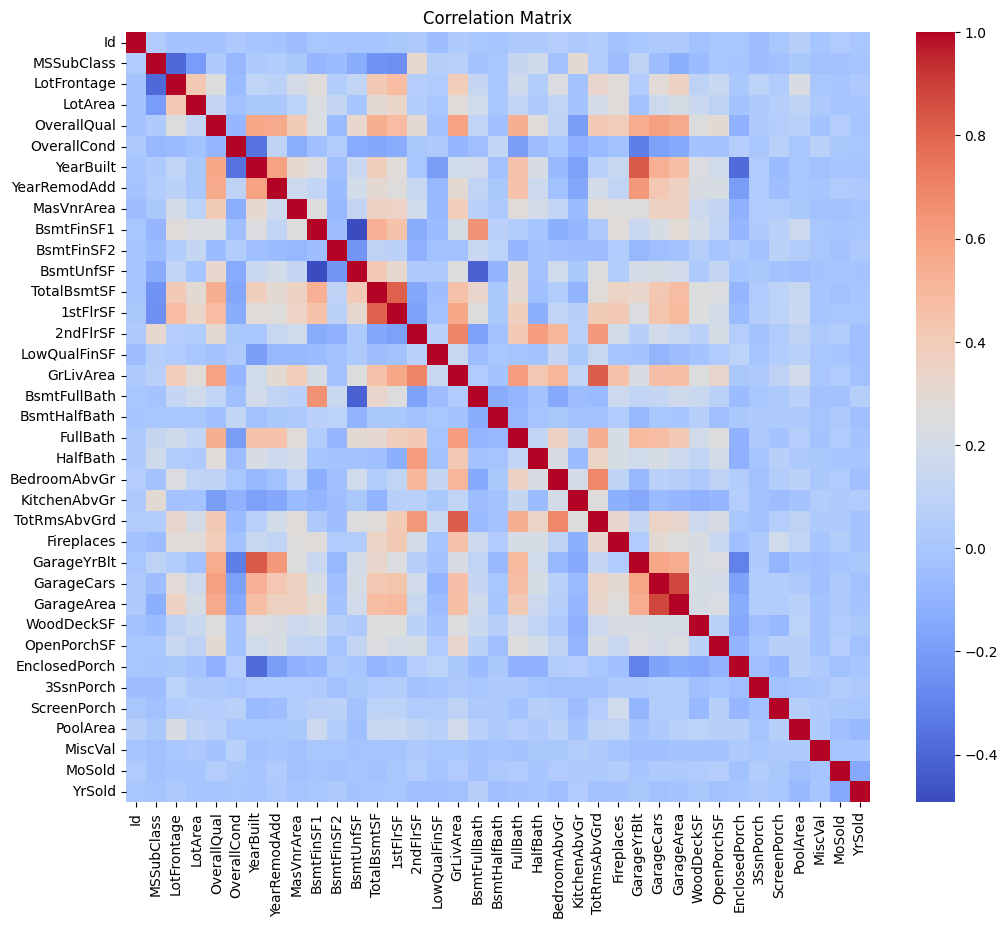

In [14]:
# берем только числовые признаки
num_cols = X_train.select_dtypes(include='number').columns

    # считаем корреляцию
corr_matrix = X_train[num_cols].corr()

    # рисуем тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(
        corr_matrix,
        # annot=True,       # показать числа на карте
        fmt=".2f",        # формат чисел
        cmap="coolwarm",  # цветовая схема
        cbar=True
    )
plt.title("Correlation Matrix")
plt.show()

,Feature,Correlation
0,OverallQual,0.790316
1,GrLivArea,0.705177
2,GarageCars,0.637729
3,GarageArea,0.608436
4,TotalBsmtSF,0.599422
5,1stFlrSF,0.598041
6,FullBath,0.553092
7,TotRmsAbvGrd,0.517919
8,YearRemodAdd,0.513843
9,YearBuilt,0.512284


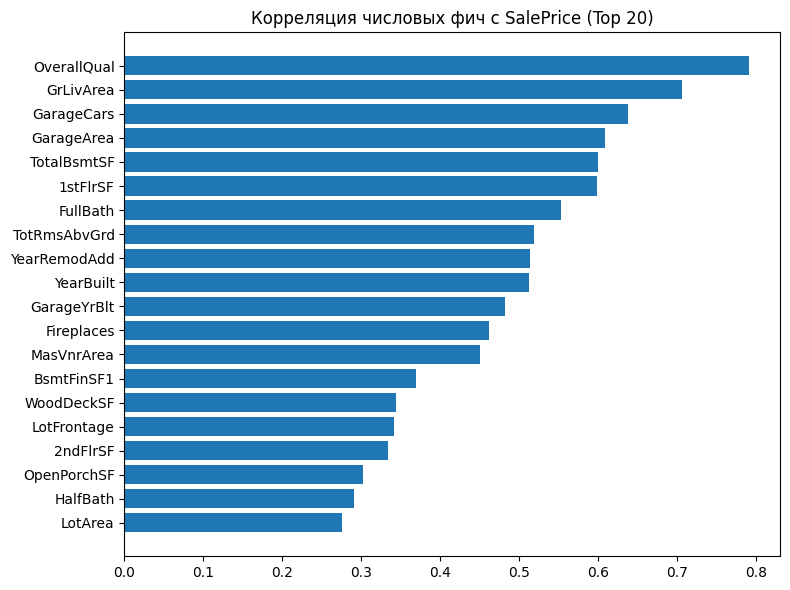

In [12]:
TARGET = "SalePrice"

# 1) работаем на копии, чтобы не затронуть X_train/X
train_data_eda = X_train.copy()
train_data_eda[TARGET] = y_train.values

# 2) берём ТОЛЬКО числовые колонки (таргет уже внутри копии)
num_cols_eda = train_data_eda.select_dtypes(include="number").columns.tolist()

# 3) считаем корреляции по числовым с таргетом
corr_with_target = (
    train_data_eda[num_cols_eda]
    .corr(numeric_only=True)[TARGET]
    .drop(TARGET, errors="ignore")        # убрать сам таргет
    .sort_values(ascending=False)
)

# 4) соберём DataFrame c корреляциями
corr_df = corr_with_target.reset_index()
corr_df.columns = ["Feature", "Correlation"]

# (опционально) уберём очевидные технические столбцы
corr_df = corr_df[corr_df["Feature"] != "Id"]

# 5) покажем топ-N
TOP_N = 20
display(corr_df.head(TOP_N))

# 6) быстрый барчарт (топ-N)
plt.figure(figsize=(8, 6))
top = corr_df.head(TOP_N)
plt.barh(top["Feature"][::-1], top["Correlation"][::-1])
plt.title(f"Корреляция числовых фич с {TARGET} (Top {TOP_N})")
plt.tight_layout()
plt.show()


/tmp/ipykernel_17592/1187401898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


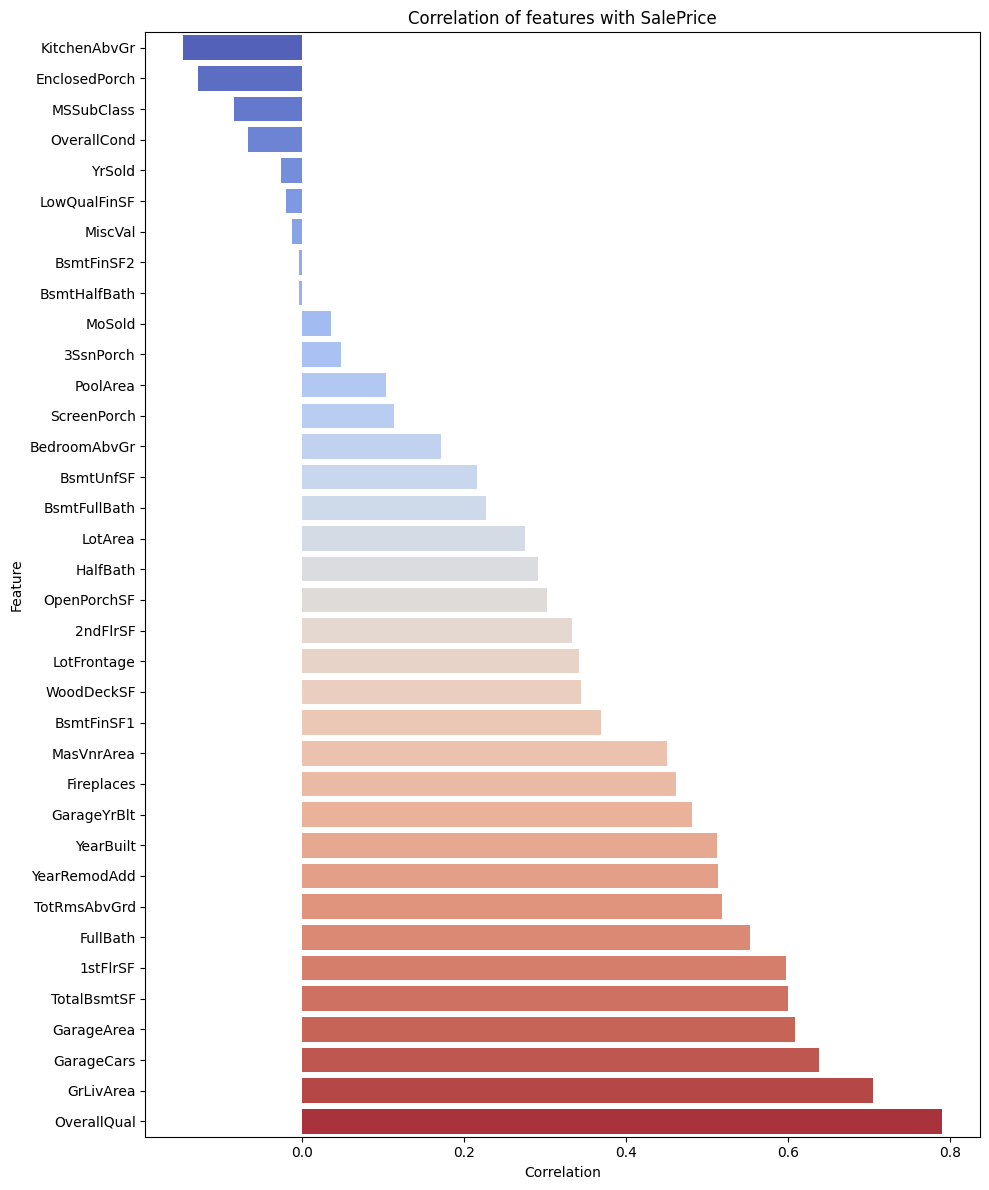

In [13]:
# Сортируем по абсолютной величине корреляции (по желанию)
corr_df_sorted = corr_df.sort_values(by='Correlation', ascending=True)  # для горизонтального barplot

plt.figure(figsize=(10, 12))
sns.barplot(
    x='Correlation',
    y='Feature',
    data=corr_df_sorted,
    palette='coolwarm'
)
plt.title('Correlation of features with SalePrice')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()

In [200]:
import numpy as np

cat_cols_small = []
cat_cols_large = []
num_cols = []

for col in X_train.columns:
    if X_train[col].dtype == "object" or X_train[col].nunique() < 20:
        # категориальные по смыслу
        if X_train[col].nunique() <= 3:
            cat_cols_small.append(col)   # мало категорий → OHE
        else:
            cat_cols_large.append(col)   # много категорий → Ordinal
    else:
        num_cols.append(col)             # полноценные числовые

print("Числовые:", len(num_cols))
print("Категориальные (≤3):", cat_cols_small)
print("Категориальные (>3):", cat_cols_large[:10], "...")


Числовые: 21
Категориальные (≤3): ['Street', 'Alley', 'Utilities', 'LandSlope', 'MasVnrType', 'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'GarageFinish', 'PavedDrive', 'PoolQC']
Категориальные (>3): ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle'] ...


In [201]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

small_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="None")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

large_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="None")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("small_cat", small_cat_pipe, cat_cols_small),
        ("large_cat", large_cat_pipe, cat_cols_large),
    ],
    remainder="drop"
)


In [202]:
y_train_log = np.log1p(y_train)  # log(1 + y)
y_valid_log = np.log1p(y_valid)

In [203]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=10,          
    eval_metric='RMSE',
    random_state=42,
    verbose=0
)

ml_pipeline_cb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', cb)
])

In [204]:
ml_pipeline_cb.fit(X_train, y_train_log)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('small_cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [205]:
y_pred_log = ml_pipeline_cb.predict(X_valid)
y_pred = np.expm1(y_pred_log)

In [206]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
print("RMSLE:", rmsle)

RMSLE: 0.11652591782496917


In [207]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, (y_pred))
print('R2:', r2)

R2: 0.9025995433035073


Сейчас будем с помощью feature selection пытаться улучшить парметры

In [208]:
low_var_cols = [c for c in X.columns if X[c].nunique() <= 1]
print("Почти константные:", low_var_cols)


Почти константные: []


In [209]:
corr_matrix = X.corr(numeric_only=True).abs()
high_corr = [(i, j, corr_matrix.loc[i, j])
             for i in corr_matrix.columns for j in corr_matrix.columns
             if i != j and corr_matrix.loc[i, j] > 0.95]
print(high_corr)


[]


In [210]:
import re
import numpy as np
import pandas as pd

# 1) извлекаем объекты из пайплайна
prep = ml_pipeline_cb.named_steps['preprocessor']
model = ml_pipeline_cb.named_steps['model']   # CatBoostRegressor

# 2) имена признаков после трансформаций
feat_names_out = prep.get_feature_names_out()  # np.array([...])

# 3) важности от CatBoost (для трансформированных колонок)
imp = model.get_feature_importance()
assert len(imp) == len(feat_names_out), (len(imp), len(feat_names_out))

fi_tr = pd.DataFrame({
    "feature_out": feat_names_out,
    "importance": imp
}).sort_values("importance", ascending=False).reset_index(drop=True)

fi_tr.sort_values(by=['importance'], ascending=True).head(10)


,feature_out,importance
104,small_cat__PoolQC_Fa,0.000000e+00
103,small_cat__Utilities_AllPub,0.000000e+00
102,small_cat__PoolQC_Ex,9.971472e-07
101,small_cat__KitchenAbvGr_3,5.812396e-06
100,small_cat__BsmtHalfBath_2,1.030890e-05
99,small_cat__PoolQC_None,1.334502e-05
98,small_cat__HalfBath_2,4.832670e-05
97,small_cat__Street_Pave,6.290439e-05
96,small_cat__Street_Grvl,8.346423e-05
95,large_cat__MiscFeature,2.430959e-04


In [211]:
# === строим fi_parent из обученного пайпа ===
prep = ml_pipeline_cb.named_steps['preprocessor']
cbm  = ml_pipeline_cb.named_steps['model']

feat_out = prep.get_feature_names_out()              # имена после трансформаций
imp      = cbm.get_feature_importance()              # важности у CatBoost по этим фичам

fi_tr = pd.DataFrame({"feature_out": feat_out, "importance": imp})

# сворачиваем важности к исходным колонкам
fi_parent = (
    fi_tr.assign(
        feature_parent=fi_tr["feature_out"]
            .str.replace(r"^(num|small_cat|large_cat)__(ohe__|ord__)?", "", regex=True)
            .str.replace(r"_[^_]+$", "", regex=True)  # режем суффикс уровня OHE
    )
    .groupby("feature_parent", as_index=False)["importance"].sum()
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

In [212]:
eps  = fi_parent["importance"].quantile(0.25)  # верхние 75%
keep = set(fi_parent.loc[fi_parent["importance"] >= eps, "feature_parent"])

num_keep   = [c for c in num_cols       if c in keep]
small_keep = [c for c in cat_cols_small if c in keep]
large_keep = [c for c in cat_cols_large if c in keep]

In [214]:
preprocessor_red = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_keep),
        ("small_cat", small_cat_pipe, small_keep),
        ("large_cat", large_cat_pipe, large_keep),
    ],
    remainder="drop"
)

In [216]:
# собираем новый пайплайн с обновлённым препроцессором
pipe_red = Pipeline([
    ("preprocessor", preprocessor_red),   # твой новый ColumnTransformer
    ("model", CatBoostRegressor(
        iterations=1000, depth=6, learning_rate=0.1, l2_leaf_reg=10,
        eval_metric="RMSE", random_state=42, verbose=0
    ))
])

# обучение (работаем в лог-пространстве таргета)
ytr_log, yva_log = np.log1p(y_train), np.log1p(y_valid)
pipe_red.fit(X_train, ytr_log)

# проверка на валидации
pred_log = pipe_red.predict(X_valid)
rmlse_red = np.sqrt(mean_squared_error(yva_log, pred_log))
r2_red = r2 = r2_score(yva_log, (pred_log))
print("RMLSE после отбора фич:", rmlse_red)
print("R2 после отбора фич:", r2_red)

RMLSE после отбора фич: 0.1144406750272145
R2 после отбора фич: 0.921905206164221
